In [9]:
#Borrar esta celda despues de ejecutarla
!pip install numpy
!pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from struct import pack, unpack

# Funciones

Para la implementación de las preguntas, considere que **solo** tiene a su disposición las siguientes funciones:

* **np.array(x)**: Convierte **x** en un arreglo de NumPy.
* **np.arange(n)**: Para **n** un número entero positivo entrega un vector de largo **n** con números enteros desde 0 a n-1.
* **np.abs(x)**: Entrega el valor absoluto de **x**.
* **np.power(x)**: Evalúa la expresión $x^n$ si **x** y **n** son escalares. En caso de que **x** e **n** sean vectores, deben tener la misma
dimensión y entrega la evaluación elemento a elemento. Si solo uno de los términos es un vector, entrega el vector donde
el término constante se consideró para cada término de vector.
* **np.sqrt(x)**: Entrega la evaluación de la raíz cuadrada no negativa de un vector o escalar **x**.
* **np.sum(x)**: Entrega la suma de los elementos de un vector **x**.
* **np.sort(x, axis)**: Ordena los elementos de **x** de menor a mayor a lo largo del eje especificado. Si **x** es un vector, entrega un nuevo vector ordenado. Si **x** es una matriz, por defecto (**axis**=-1) ordena cada fila de forma independiente. Puedes usar **axis**=0 para ordenar por columnas y **axis**=1 para ordenar por filas.
* **pack(_format_, _value 1_, _value 2_, ...)**: Retorna un **bytes object**, que permite obtener los octetos de la representacion binaria, el formato es una string formado de dos char, "<" para little-endian y ">" para Big-endian, seguido de la siguiente tabla para los formatos:

    | Format | C Type                | Python Type     | Standard Size |
    |--------|-----------------------|----------------|---------------|
    | x      | pad byte              | no value       |               ||
    | c      | char                  | bytes of length 1 | 1         |
    | b      | signed char           | integer        | 1             |
    | B      | unsigned char         | integer        | 1             |
    | ?      | _Bool                 | bool           | 1             |
    | h      | short                 | integer        | 2             |
    | H      | unsigned short        | integer        | 2             |
    | i      | int                   | integer        | 4             |
    | I      | unsigned int          | integer        | 4             |
    | l      | long                  | integer        | 4             |
    | L      | unsigned long         | integer        | 4             |
    | q      | long long             | integer        | 8             |
    | Q      | unsigned long long    | integer        | 8             |
    | n      | ssize_t               | integer        |               |
    | N      | size_t                | integer        |               |
    | e      | (6)                   | float          | 2             |
    | f      | float                 | float          | 4             |
    | d      | double                | float          | 8             |
    | s      | char[]                | bytes          |               |
    | p      | char[]                | bytes          |               |
    | P      | void*                 | integer        |               |

* **bytes.zfill(_width_)**: Retorna una copia de la secuencia rellenando con "0" hasta hacer la secuencia del largo width.
* **bin(x)**: Convierte un int a una cadena binaria con el prefijo “0b”

# Pregunta 1

1.1 **(35 puntos)** Conociendo el *estándar de punto flotante IEEE 754*, el cual tiene un bit implicito, un bit reservado para el signo, y dependiendo de la precision *x* bits de exponente e *y* bits de mantissa.
Contruya la función `float_to_bin`, la cual recibe como parámetros `number` y `precision`. La función debe retornar el número dado por parámetro en *estándar de punto flotante* según la precisión dada.

*Hint: Python cannot convert a float to an int natively, so the use of `pack()` is recommended. Additionally, you can use Python `f-strings` to manipulate the representation of data.*

In [2]:
def float_to_bin(number, precision):
    """
    input:
    number          : (float) A number in float python type
    precision       : (int) the representation to use, it can only be 16,
                      32 or 64 bits

    output:
    result_tuple    : (tuple) A tuple containing three binary strings (sign, exponent, and mantissa) 
                              representing a number in the IEEE 754 16-bit, 32-bit or 64-bit floating-point standard.
    """
    #acá va su codigo
    #--------------------------------
    if precision == 16: # Representación en 16 bits (half precision)
        packed = pack(">e", number)  # Tomamos los bytes del numero 16b
        bits = ''.join(f"{byte:08b}" for byte in packed) # los concatenamos binariamente en una str
        sign, exponent, mantissa = bits[0], bits[1:6], bits[6:]
    elif precision == 32: # Representación en 32 bits (single precision)
        packed = pack(">f", number) #32b
        bits = ''.join(f"{byte:08b}" for byte in packed)
        sign, exponent, mantissa = bits[0], bits[1:9], bits[9:]
    elif precision == 64: # Representación en 64 bits (double precision)
        packed = pack(">d", number) #64b
        bits = ''.join(f"{byte:08b}" for byte in packed)
        sign, exponent, mantissa = bits[0], bits[1:12], bits[12:]
    else:
        raise ValueError("Precision must be 16, 32, or 64 bits.")
    #--------------------------------
    result_tuple = (sign, exponent, mantissa)
    return result_tuple

1.2 **(10 puntos)** Dado el número decimal $\pi$, obtenga su *error absoluto de redondeo* y su *cota superior* en *half precision*. Finalmente, explique por qué el *error absoluto* de representar un número es proporcional al tamaño del número original.

$$ |fl(x) - x| \leq \frac{1}{2} \cdot \epsilon_{mach}|x| $$

In [3]:
#No modificar este código, solamente ejecute.
float_to_bin(np.pi, 16)

('0', '10000', '1001001000')

In [4]:
#acá va su codigo
#--------------------------------
err_abs = np.abs(3.140625 - np.pi)
cota_sup = ((2**-10)*np.abs(np.pi))/2 
#--------------------------------
(err_abs, cota_sup)

(np.float64(0.000967653589793116), np.float64(0.0015339807878856412))

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

En el estándar IEEE 754, los números se representan en un formato de punto flotante que divide el número en una mantisa y un exponente. La mantisa tiene una cantidad fija de bits (10 bits explícitos en este caso), lo que significa que solo podemos representar un número con una precisión limitada. Cuando redondeamos un número como $\pi$ a este formato, el error absoluto surge porque no podemos capturar todos los dígitos del número original.

El error absoluto es proporcional al tamaño del número original porque, en el formato de punto flotante, el espaciado entre números representables crece con la magnitud del número (debido al exponente). Un número más grande tiene un exponente mayor, lo que significa que los números representables están más separados, y el error de redondeo (que depende de este espaciado) será mayor. Por eso, el error absoluto aumenta a medida que el número original se hace más grande.

**---------------------------------------------------------------------------------------------------------------------------**

# Pregunta 2

Dada la siguiente función:

$$ f(k) = \frac{\sqrt{k} - 4}{k} $$

Se requiere trabajar con su derivada, pero dado que derivar directamente esta función puede ser muy costoso computacionalmente, es necesario emplear el método de *Diferencias Finitas* para aproximar su derivada. En este caso, utilizaremos la fórmula de *Central Difference*, que se aplica a nuestra función de la siguiente manera:

$$ f'(k, h) = \lim_{h \to 0} \frac{f(k + h) - f(k - h)}{2h} $$

Donde el valor de $h$, representa el tamaño del intervalo utilizado para aproximar la derivada, por lo tanto, $h$ debe ser lo suficientemente pequeño de modo que la aproximación sea precisa y la expresión se acerque al valor real del límite. Un $h$ pequeño reduce el error de la derivada, sin embargo, esta variable no puede ser arbitrariamente pequeña, ya que en *double precision* esto puede introducir problemas de pérdida de importancia y de error de cancelación.

Debido a esto, se define $h$ como una función de una variable x:

$$ h(x) = 2^{-x} $$

Esto implica que a medida que $x$ aumenta, $h(x)$ se hace exponencialmente más pequeño.

Dados estos cambios, se obtiene la siguiente función:

$$ f'(k, x) = \frac{\frac{\sqrt{k + 2^{-x}} - 4}{k + 2^{-x}} - \frac{\sqrt{k - 2^{-x}} - 4}{k - 2^{-x}}}{2 \cdot 2^{-x}} $$

Sean $g_1(k, h)$ y $g_2(k, h)$, el primer y segundo término del numerador de la función $f'(k, x)$, respectivamente. Estas funciones quedan definidas como:

$$ g_1(k, x) = \frac{\sqrt{k + 2^{-x}} - 4}{k + 2^{-x}} $$

$$ g_2(k, x) = \frac{\sqrt{k - 2^{-x}} - 4}{k - 2^{-x}} $$

Donde se considerará un valor de *k* fijo y un valor de x variable con el objetivo de analizar el comportamiento de dicha función según el valor de este último parámetro.

In [5]:
#No modificar este código, solamente ejecute.
g1 = lambda k, x: (np.sqrt(k + np.power(2., -x)) - 4)/(k + np.power(2., -x))
g2 = lambda k, x: (np.sqrt(k - np.power(2., -x)) - 4)/(k - np.power(2., -x))
f_prime = lambda k, x: (g1(k, x) - g2(k, x))/(2*np.power(2., -x))

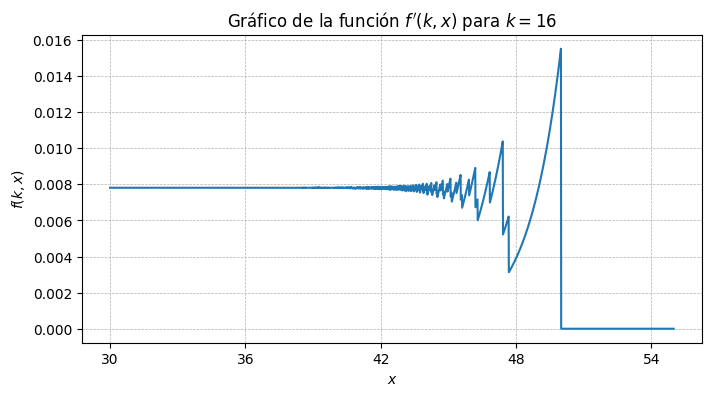

In [6]:
#No modificar este código, solamente ejecute.
k = 16
x = np.arange(30, 55, 0.01)

plt.figure(figsize=(8, 4))
plt.plot(x, f_prime(k, x))

plt.xlabel("$x$")
plt.ylabel("$f(k, x)$")
plt.title("Gráfico de la función $f'(k, x)$ para $k = 16$")
plt.xticks(np.arange(30, 55, 6))

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

2.1 **(40 puntos)** Encuentre el menor $x \in \mathbb{N}$ tal que las funciones $g_1(k, x)$, $g_2(k, x)$ y $f'(k, x)$ sean iguales a $0$ en *double precision* para un valor fijo $k = 16$ (Evalúe cada caso para cada función).

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

* Para $g_1(k, x)$:

Dado que en este caso tenemos que $k=16$, nos queda la siguiente expresión:

$$ g_1(k=16, x) = \frac{\sqrt{16 + 2^{-x}} - 4}{16 + 2^{-x}} $$

Lo que nos interesa es el numerador, ya que si $2^{-x}$ es lo suficientemente pequeño, entonces $\sqrt{16 + 2^{-x}} = 4$, lo que provocaría un error de cancelación en el numerador, dejándolo igual a $0$.

Por lo tanto, debemos encontrar un valor de $x$ para el cual $16 + 2^{-x} = 16$. Dado lo anterior, el número más pequeño que se puede sumar a $16$ en doble precisión no es el mismo que se le puede sumar a $1$, ya que la distancia entre los numeros representables cambia según la magnitud de este.

Para números en el rango $[2^{0}, 2^{1})$, la distancia es $\epsilon_{mach} = 2^{-52}$, es decir, para que no se pueda sumar un número al $1$, su distancia debe de ser mayor a $52$. Para números en el rango $[2^{1}, 2^{2})$, la distancia es $2 \times \epsilon_{machine} = 2^{-51}$. Para números en el rango $[2^{2}, 2^{3})$, la distancia es $4 \times \epsilon_{mach} = 2^{-50}$ y así sucesivamente.

En nuestro caso, $k$ está en el rango $[2^{4}, 2^{5})$, donde la distancia es $16 \times \epsilon_{machine} = 2^{-48}$. Para que no se pueda sumar un número a $k=16$, su distancia debe ser mayor a $48$. Con esto, podemos concluir que $x = 49$, para que $\sqrt{16 + 2^{-x}} = 4$ y ocurra un error de cancelación.

* Para $g_2(k, x)$:

Ahora tenemos la siguiente expresión:

$$ g_2(k=16, x) = \frac{\sqrt{16 - 2^{-x}} - 4}{16 - 2^{-x}} $$

El único cambio que tenemos, es que ahora necesitamos encontrar un valor de $x$ para el cual $16 - 2^{-x} = 16$. Podemos darnos cuenta que $x$ ya no puede ser $49$, si no que ahora será $50$. Esto sucede ya que ahora estamos evaluando una resta donde $16$ pasará a ser $15.999...$, es decir, el rango donde estará nuestro número ya no es $[2^{4}, 2^{5})$, si no que ahora es $[2^{3}, 2^{4})$, con una distancia de $4 \times \epsilon_{mach} = 2^{-49}$.

Por lo tanto, para que no se le pueda restar un número a $16$, su distancia debe ser mayor a $49$. Con esto, podemos que concluir que $x = 50$, para que $\sqrt{16 - 2^{-x}} = 4$.

* Para $f'(k, x)$:

Como encontramos el valor de $x$ para que $g_1(k, x)$ y $g_2(k, x)$ se hagan $0$, debemos tomar el valor mayor de $x$ entre las dos funciones. Esto es debido a que si tomamos $f'(k=16, x=49)$, solo ocurrirá pérdida de importancia y error de cancelación en $g1(k, x)$, pero si tomamos un $x = 50$, ambas funciones darán $0$, llevando a $f'(k=16, x=50) = 0$.

**---------------------------------------------------------------------------------------------------------------------------**

2.2 **(15 puntos)** Construya la función `gap_non_representable`, la cual recibe como parámetro el número `num_ieee754` en *estándar de punto flotante de 64 bits*. La función debe retornar el tamaño del *gap* o *distancia* para la suma y la resta, donde ocurra *pérdida de importancia*.

In [7]:
def gap_non_representable(num_ieee754):
    """
    input:
    num_ieee754    : (tuple) A tuple containing three binary strings (sign, exponent, and mantissa) 
                             representing a number in the IEEE 754 64-bit floating-point standard.

    output:
    result_str     : (str) A string in the format "2^(-exp_pos), 2^(-exp_neg)", where:
                            - exp_pos is the exponent that represents the gap between the number and the next non-representable number greater than it.
                            - exp_neg is the exponent that represents the gap between the number and the next non-representable number less than it.
    """
    #acá va su codigo
    #--------------------------------
    signo, exponente, mantissa = num_ieee754

    signo_int = int(signo, 2)
    exponente_int = int(exponente, 2)
    mantissa_int = int(mantissa, 2)
    mantissa_val = 1.0 + (mantissa_int / (2 ** 52))

    sesgo = 1023

    exponente_real = exponente_int - sesgo

    exp_pos = 53 - exponente_real

    num = (-1)**signo_int * mantissa_val * (2.0 ** exponente_real)

    epsilon = 1.0
    exp_neg = 0
    while (num - epsilon) < num:
        epsilon /= 2.0
        exp_neg += 1
    #--------------------------------
    result_str = f"2^{{-{exp_pos}}}, 2^{{-{exp_neg}}}"
    return result_str

In [8]:
#No modificar este código, solamente ejecute.
num_ieee754 = float_to_bin(16, 64)
gap_non_representable(num_ieee754)

'2^{-49}, 2^{-50}'